# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\Quantile Regression/data_jobs_demand.csv")

### Explore the Data

In [3]:
df.head()

,date,region,job_role,avg_salary_usd,job_postings,applicants_per_posting,q10_demand,q50_demand,q90_demand
0,2019-01-01,North America,Data Scientist,129101.28,669,7.34,654.43,669,679.84
1,2019-01-01,North America,Machine Learning Engineer,126224.29,597,7.75,586.27,597,601.26
2,2019-01-01,North America,Data Analyst,126345.13,730,9.38,719.06,730,737.89
3,2019-01-01,North America,AI Researcher,125908.41,356,12.71,347.63,356,366.33
4,2019-01-01,North America,MLOps Engineer,132442.04,422,15.26,412.88,422,428.94


### Check the total number of columns and rows

In [23]:
df.shape

(1800, 8)

### Remove Irrelevant Columns

In [8]:
df = df.drop(columns=["date"],axis=1)

### Check it the column remove successfully or not ( Successfully removed it)

In [9]:
df.head()

,region,job_role,avg_salary_usd,job_postings,applicants_per_posting,q10_demand,q50_demand,q90_demand
0,North America,Data Scientist,129101.28,669,7.34,654.43,669,679.84
1,North America,Machine Learning Engineer,126224.29,597,7.75,586.27,597,601.26
2,North America,Data Analyst,126345.13,730,9.38,719.06,730,737.89
3,North America,AI Researcher,125908.41,356,12.71,347.63,356,366.33
4,North America,MLOps Engineer,132442.04,422,15.26,412.88,422,428.94


### Import Label Encdoer from sklearn with Module preprocessing for convert categorical data into Numerical 

In [10]:
from sklearn.preprocessing import LabelEncoder

### Apply Label Encoder

In [12]:
le = LabelEncoder()
df["region"] = le.fit_transform(df["region"])
df["job_role"] = le.fit_transform(df["job_role"])

### Check the country column convert into numerical or not (sucessfully converted into numerical)

In [13]:
df.head()

,region,job_role,avg_salary_usd,job_postings,applicants_per_posting,q10_demand,q50_demand,q90_demand
0,3,2,129101.28,669,7.34,654.43,669,679.84
1,3,4,126224.29,597,7.75,586.27,597,601.26
2,3,1,126345.13,730,9.38,719.06,730,737.89
3,3,0,125908.41,356,12.71,347.63,356,366.33
4,3,3,132442.04,422,15.26,412.88,422,428.94


### Check the Null Values

In [14]:
df.isnull().sum()

region                    0
job_role                  0
avg_salary_usd            0
job_postings              0
applicants_per_posting    0
q10_demand                0
q50_demand                0
q90_demand                0
dtype: int64

### Check Inofrmation about the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  1800 non-null   int64  
 1   job_role                1800 non-null   int64  
 2   avg_salary_usd          1800 non-null   float64
 3   job_postings            1800 non-null   int64  
 4   applicants_per_posting  1800 non-null   float64
 5   q10_demand              1800 non-null   float64
 6   q50_demand              1800 non-null   int64  
 7   q90_demand              1800 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 112.6 KB


### Check the Stastistical Summary of the data

In [16]:
df.describe()

,region,job_role,avg_salary_usd,job_postings,applicants_per_posting,q10_demand,q50_demand,q90_demand
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,2.000000,2.000000,111866.221089,564.624444,12.485172,554.574411,564.624444,574.644800
std,1.414607,1.414607,26279.920950,207.898568,4.302519,208.037879,207.898568,208.012145
min,0.000000,0.000000,67533.390000,191.000000,5.010000,178.620000,191.000000,197.240000
25%,1.000000,1.000000,87539.847500,410.000000,8.760000,398.857500,410.000000,419.320000
50%,2.000000,2.000000,109565.165000,528.000000,12.540000,518.655000,528.000000,538.605000
75%,3.000000,3.000000,133520.665000,690.000000,16.230000,680.400000,690.000000,699.902500
max,4.000000,4.000000,172446.080000,1360.000000,19.990000,1350.910000,1360.000000,1374.760000


### Check the outlier in data with the boxplot

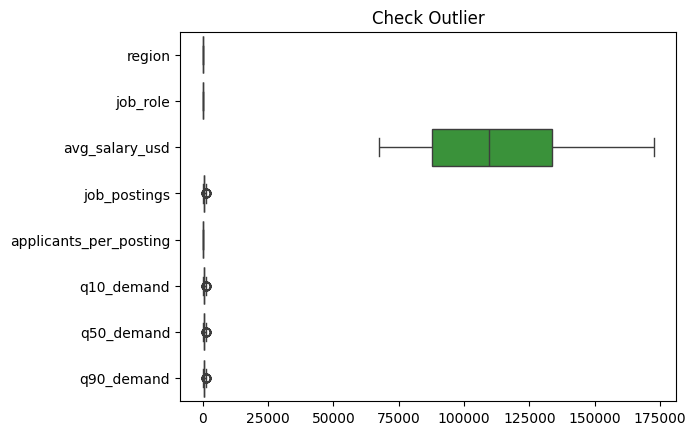

In [21]:
sns.boxplot(data=df,orient='h')
plt.title("Check Outlier")
plt.show()

### Check the relationship between the columns through pairplot 

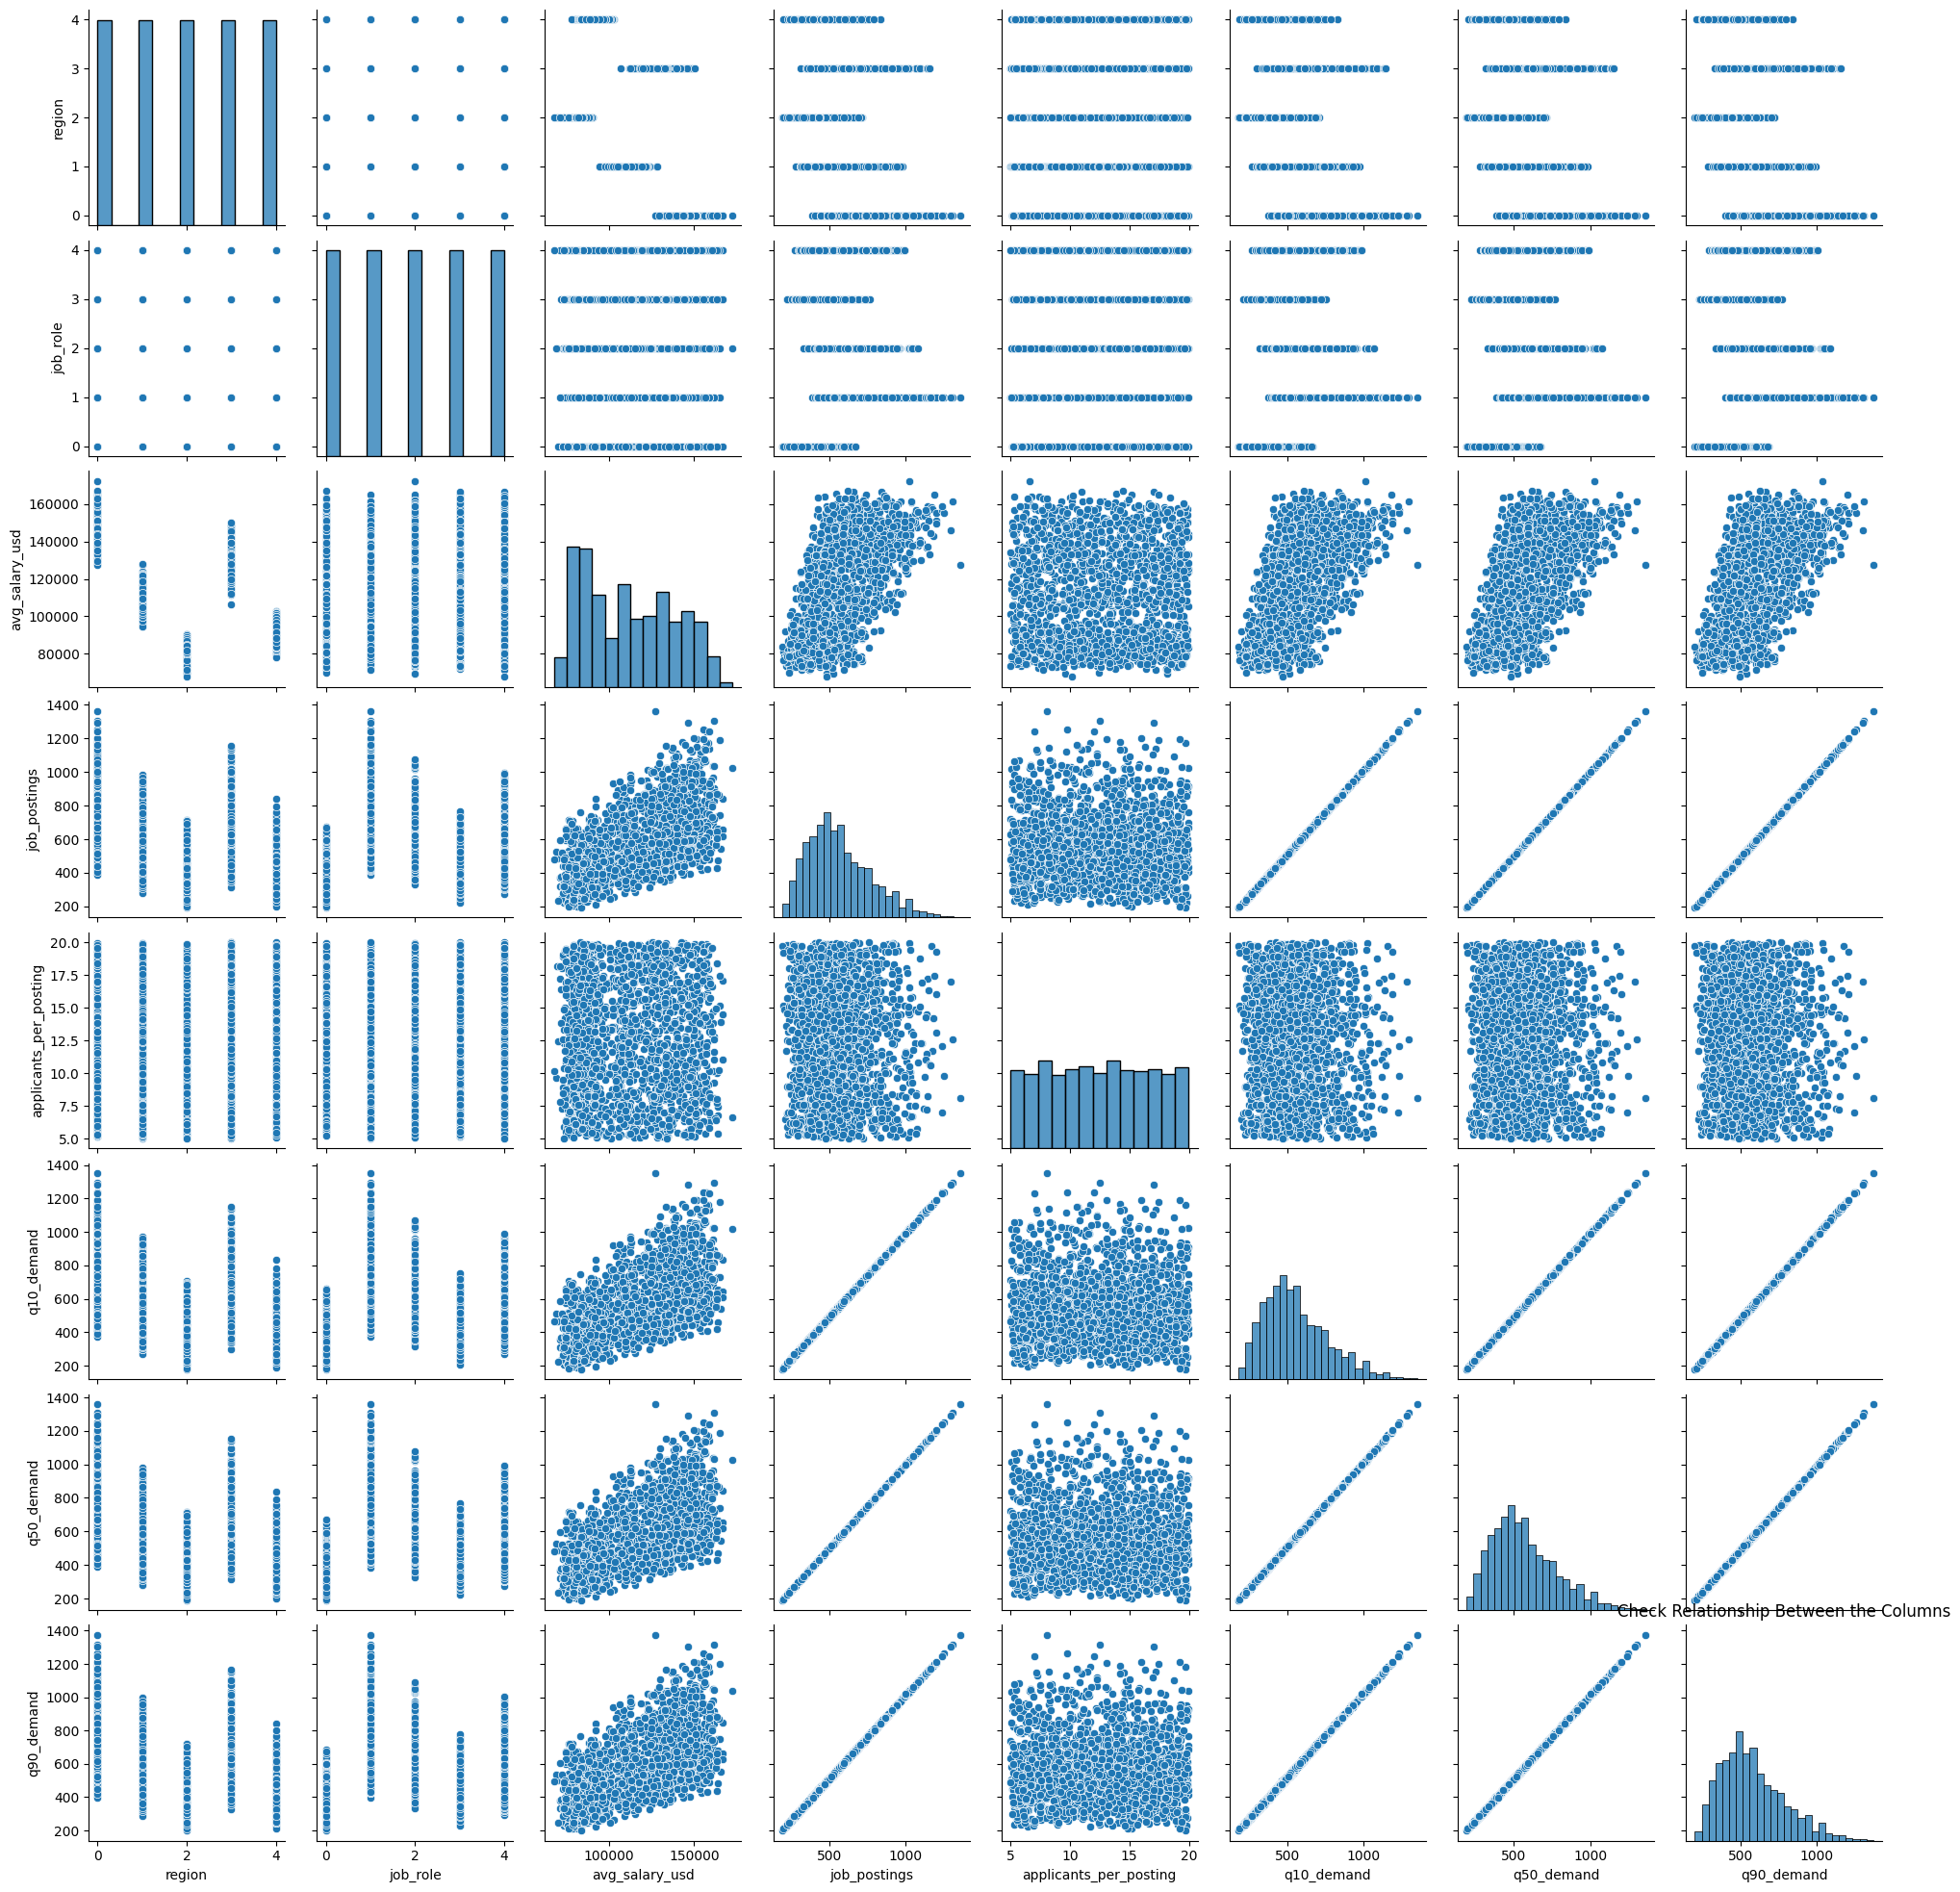

In [22]:
sns.pairplot(data=df)
plt.title("Check Relationship Between the Columns")
plt.show()

### Check the co-relationship between the column through heatmap

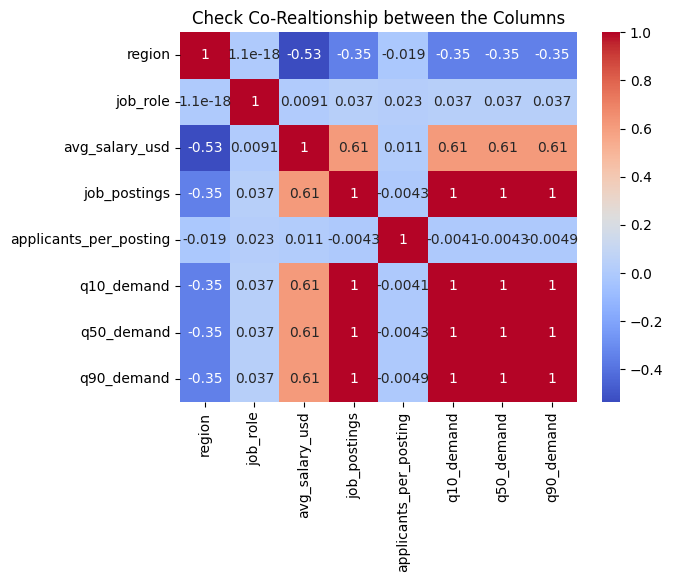

In [25]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.title("Check Co-Realtionship between the Columns")
plt.show()

### Split the data in x and y (Dependent & Independent Variable)

In [26]:
x = df.iloc[:,:-1]
y = df[["q90_demand"]]

### Import Train Test Split From sklearn module model_selection for spliting the data in Training and Testing 

In [27]:
from sklearn.model_selection import train_test_split

### Split the data in traning and testing 

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Import Machine Learning Model TheilSenRegression from sklearn module Linear Model

In [29]:
from sklearn.linear_model import QuantileRegressor

### Apply/Fit the model

In [30]:
qr = QuantileRegressor()
qr.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,quantile,0.5
,alpha,1.0
,fit_intercept,True
,solver,'highs'
,solver_options,None


### Check the score (accurray) of the model for check the scanerio of the **overfitting** (But Our Model is not **overrfit**)

In [31]:
qr.score(x_test,y_test)*100 , qr.score(x_train,y_train)*100

(99.98242730215861, 99.97912732536436)

### Predict the Value

In [32]:
df["Prediction"] = qr.predict(x)
df.head()

,region,job_role,avg_salary_usd,job_postings,applicants_per_posting,q10_demand,q50_demand,q90_demand,Prediction
0,3,2,129101.28,669,7.34,654.43,669,679.84,678.962754
1,3,4,126224.29,597,7.75,586.27,597,601.26,606.929803
2,3,1,126345.13,730,9.38,719.06,730,737.89,739.998147
3,3,0,125908.41,356,12.71,347.63,356,366.33,365.806103
4,3,3,132442.04,422,15.26,412.88,422,428.94,431.830698


### Import Metrics from sklearn to check overall performace of the model¶

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance

In [34]:
y_pred = qr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 2.24
📉 MSE: 8.10
📉 RMSE: 2.85
🎯 R² Score: 99.98


### Check the Performance of the model through Data Visualization 

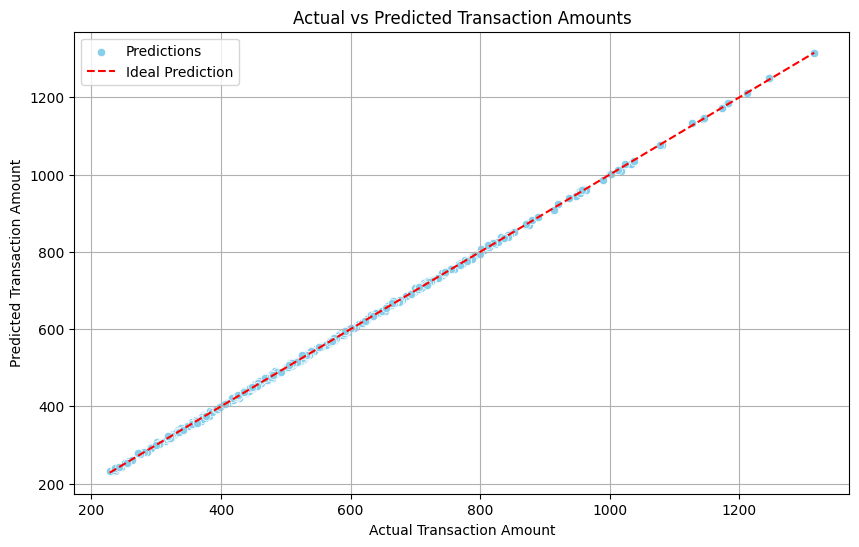

In [35]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted Transaction Amounts")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Conclusion

In this project, we implemented **Quantile Regression** to estimate the conditional distribution of the target rather than just the mean. By modeling multiple quantiles (e.g., Q10, Q50, Q90), we captured **asymmetric errors and heteroscedasticity**, which are common in real-world data.

**What worked well**
- The model produced coherent quantile curves (Q10 ≤ Q50 ≤ Q90), indicating stable training.
- Features engineered with domain intuition improved median (Q50) performance.
- The quantile view provided actionable risk bounds (pessimistic and optimistic scenarios).

**What to improve next**
- Report **pinball loss** per quantile and add **coverage analysis** (e.g., actual share of targets falling between Q10–Q90).
- Strengthen **reproducibility** (global seeds, `random_state` everywhere).
- Expand **diagnostics**: residuals vs. fitted by quantile, calibration plots, and prediction interval width.
- Explore alternative estimators with **quantile loss** (e.g., Gradient Boosting, LightGBM) and tune regularization (`alpha`) for better tails.

**Takeaway**
Quantile Regression provides a more informative prediction framework than mean regression, especially under noise and outliers. With full diagnostics, careful validation, and model tuning, this pipeline is production-ready and can be extended to decision-making scenarios that require uncertainty-aware forecasts.
